<a href="https://colab.research.google.com/github/i-am-parker01/iris-flower-classification/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
# importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [81]:
data =pd.read_csv("Iris.csv.csv")
data.isnull().sum()
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [82]:
# 3️⃣ Data Information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [83]:
print(data.duplicated().sum())
# df = data.drop_duplicates()


0


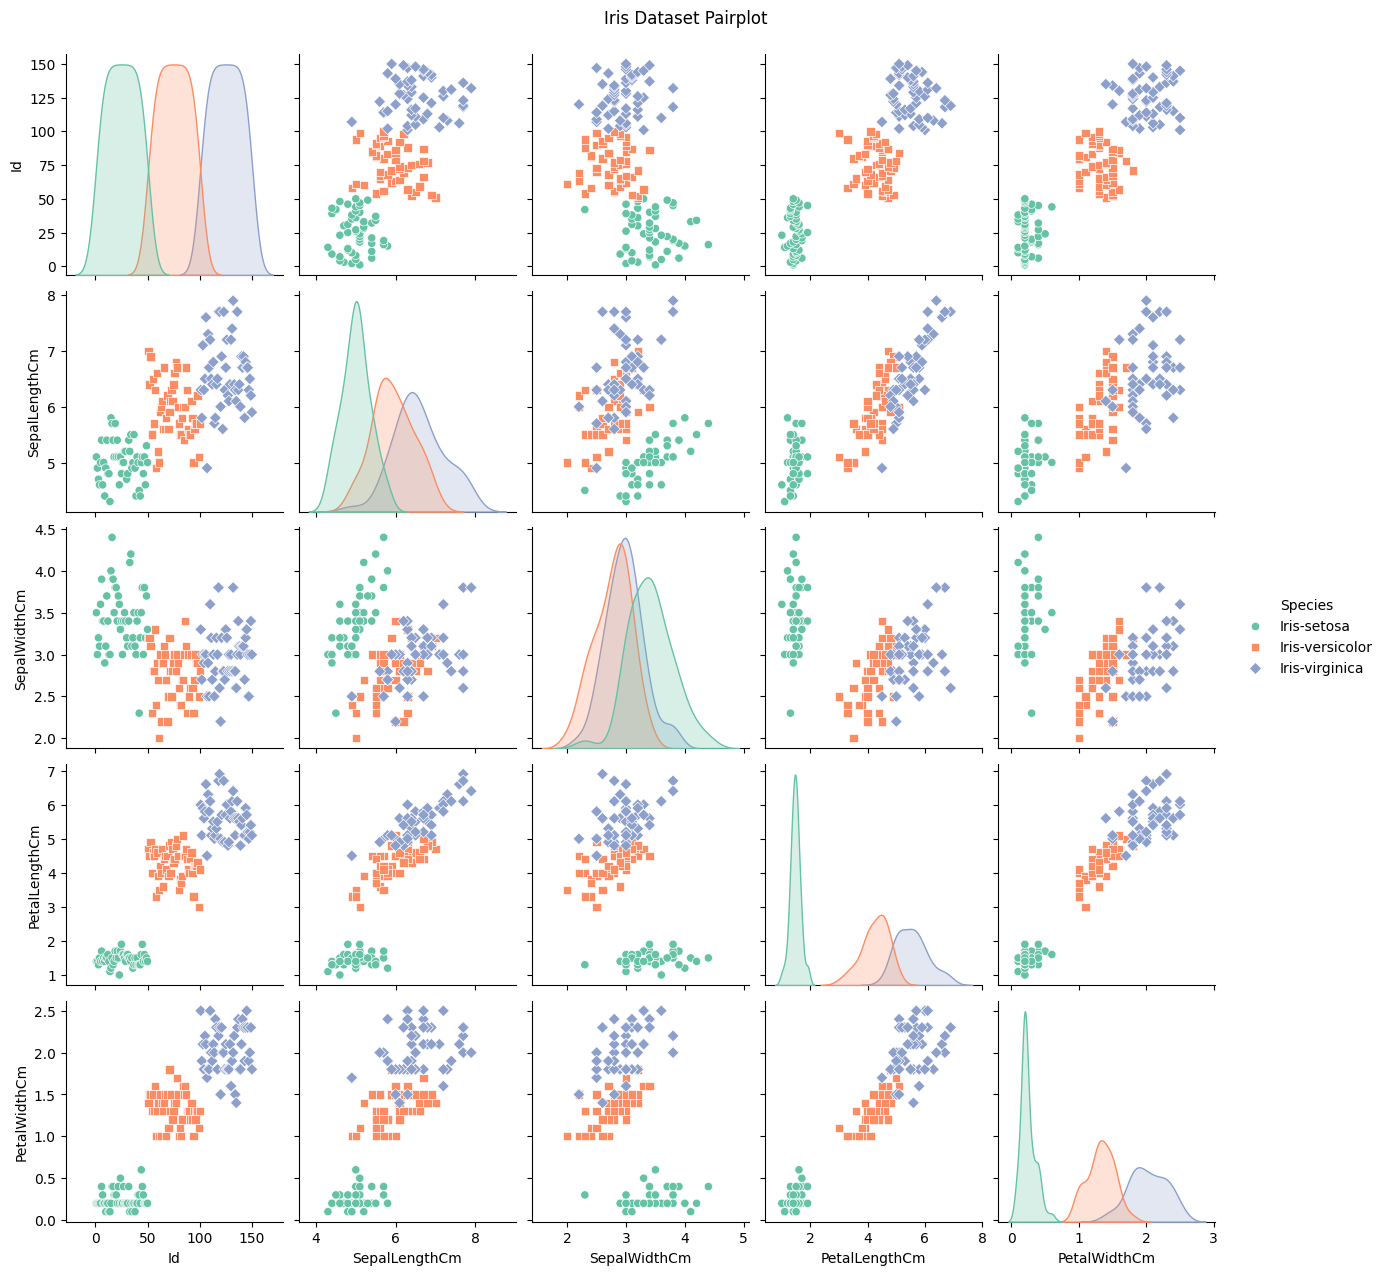

In [84]:
# 4 Visualizations

# Pairplot of all features
sns.pairplot(data, hue="Species", markers=["o", "s", "D"], palette="Set2")
plt.suptitle("Iris Dataset Pairplot", y=1.02)
plt.show()

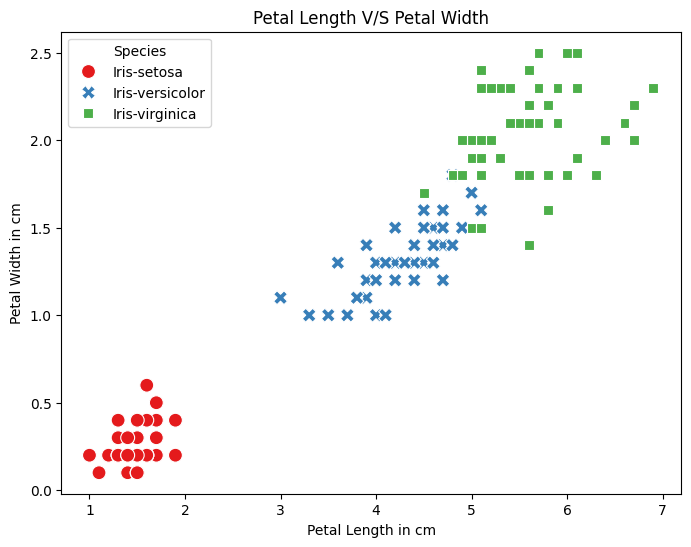

In [87]:
# Scatter plot: Petal Length vs Petal Width
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=data,
    x="PetalLengthCm",
    y="PetalWidthCm",
    hue="Species",
    style="Species",
    palette="Set1",
    s=100
)
plt.title("Petal Length V/S Petal Width")
plt.xlabel("Petal Length in cm")
plt.ylabel("Petal Width in cm")
plt.show()


In [88]:
# 5 Preparing the  Features and Target:
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data['Species']

In [89]:
# 6️ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [90]:
# 7 Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [91]:
# 8 Predictions
y_pred = model.predict(X_test)

In [92]:
# 9 Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Accuracy of the model is 1.0 that is 100%

In [93]:
# Testing with New Data
# measurements: [SepalLength, SepalWidth, PetalLength, PetalWidth]
test_set = [
    [5.1, 3.5, 1.4, 0.2],  #Setosa
    [6.0, 2.9, 4.5, 1.5],  #Versicolor
    [6.5, 3.0, 5.5, 2.0]   #Virginica
]
test_predictions = model.predict(test_set)

print("Test Predictions :")
for measurement, species in zip(test_set, test_predictions):
    print(f"Measurements: {measurement} → Predicted Species: {species}")

Test Predictions :
Measurements: [5.1, 3.5, 1.4, 0.2] → Predicted Species: Iris-setosa
Measurements: [6.0, 2.9, 4.5, 1.5] → Predicted Species: Iris-versicolor
Measurements: [6.5, 3.0, 5.5, 2.0] → Predicted Species: Iris-virginica


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
